<a href="https://colab.research.google.com/github/DavidJeonKr/lab_python/blob/master/data_04_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [2]:
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [3]:
clf.predict([[2., 2.]])

array([1])

In [4]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
X, y

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

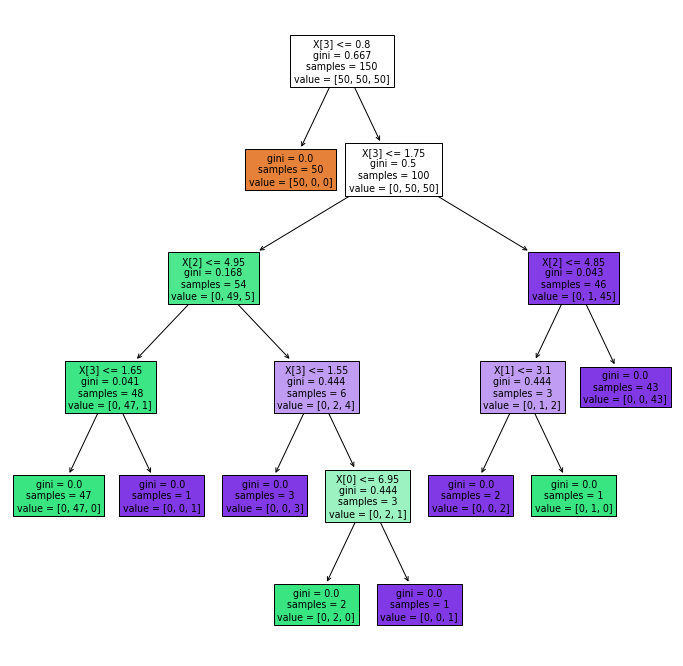

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
t= tree.plot_tree(clf, filled=True)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')
df.shape

(768, 9)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
train = df[:split_count].copy()
train

In [20]:
train.shape

(614, 9)

In [24]:
test = df[split_count:].copy()
test.shape

(154, 9)

In [28]:
feature_names =  train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [30]:
label_name = train.columns[-1]
label_name

'Outcome'

In [36]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [35]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [38]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [41]:
y_test = test[label_name]
print(y_test.shape)
y_test

(154,)


614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [45]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

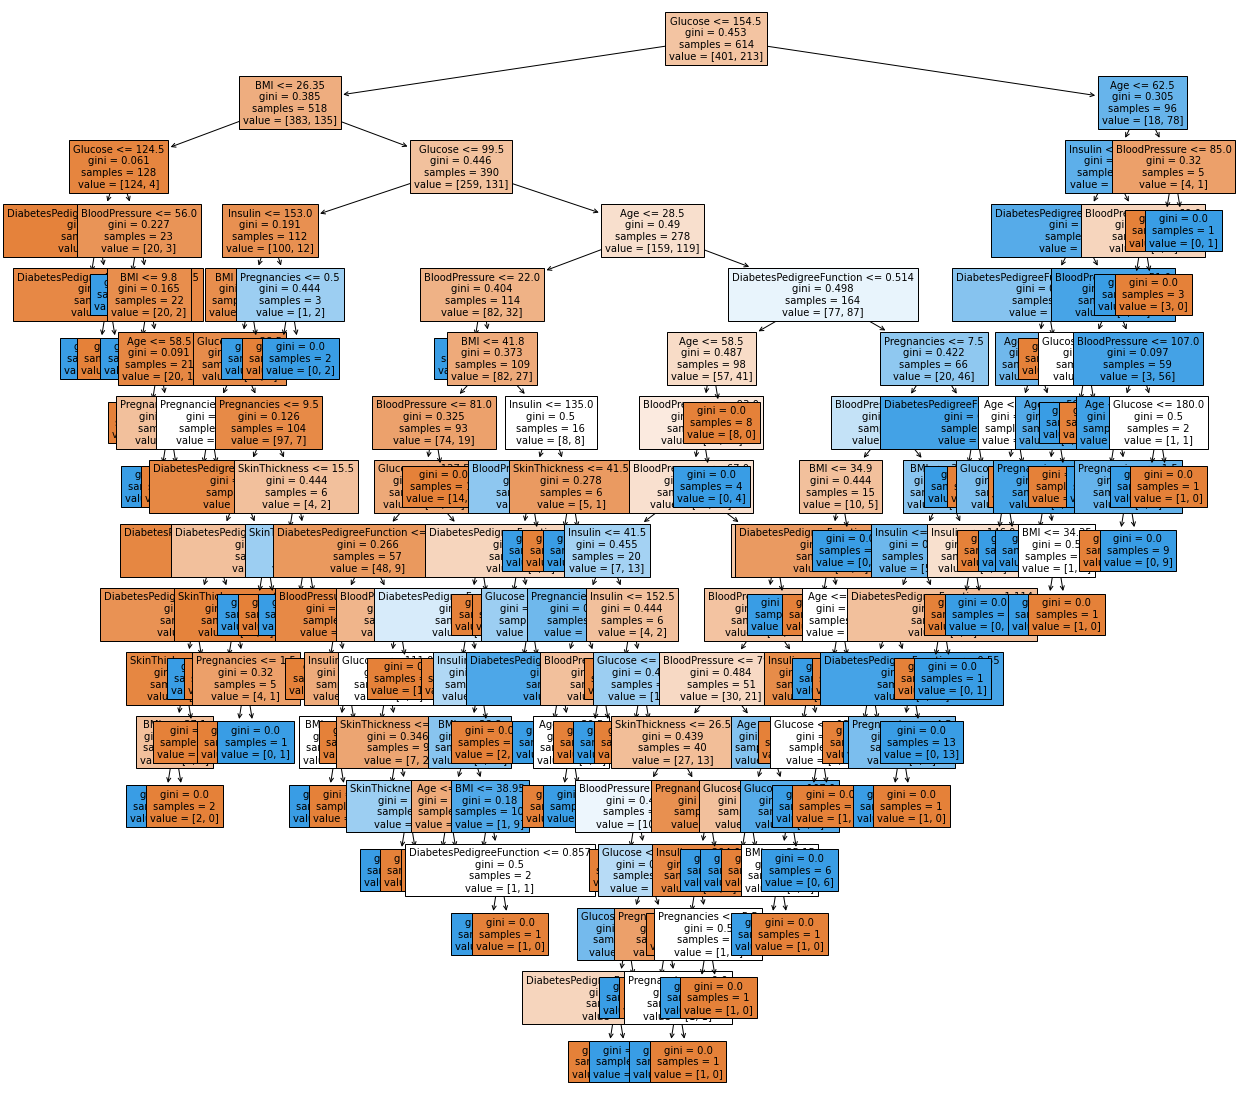

In [51]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
tree = plot_tree(model, feature_names=feature_names
                 , filled=True, fontsize=10
                 )

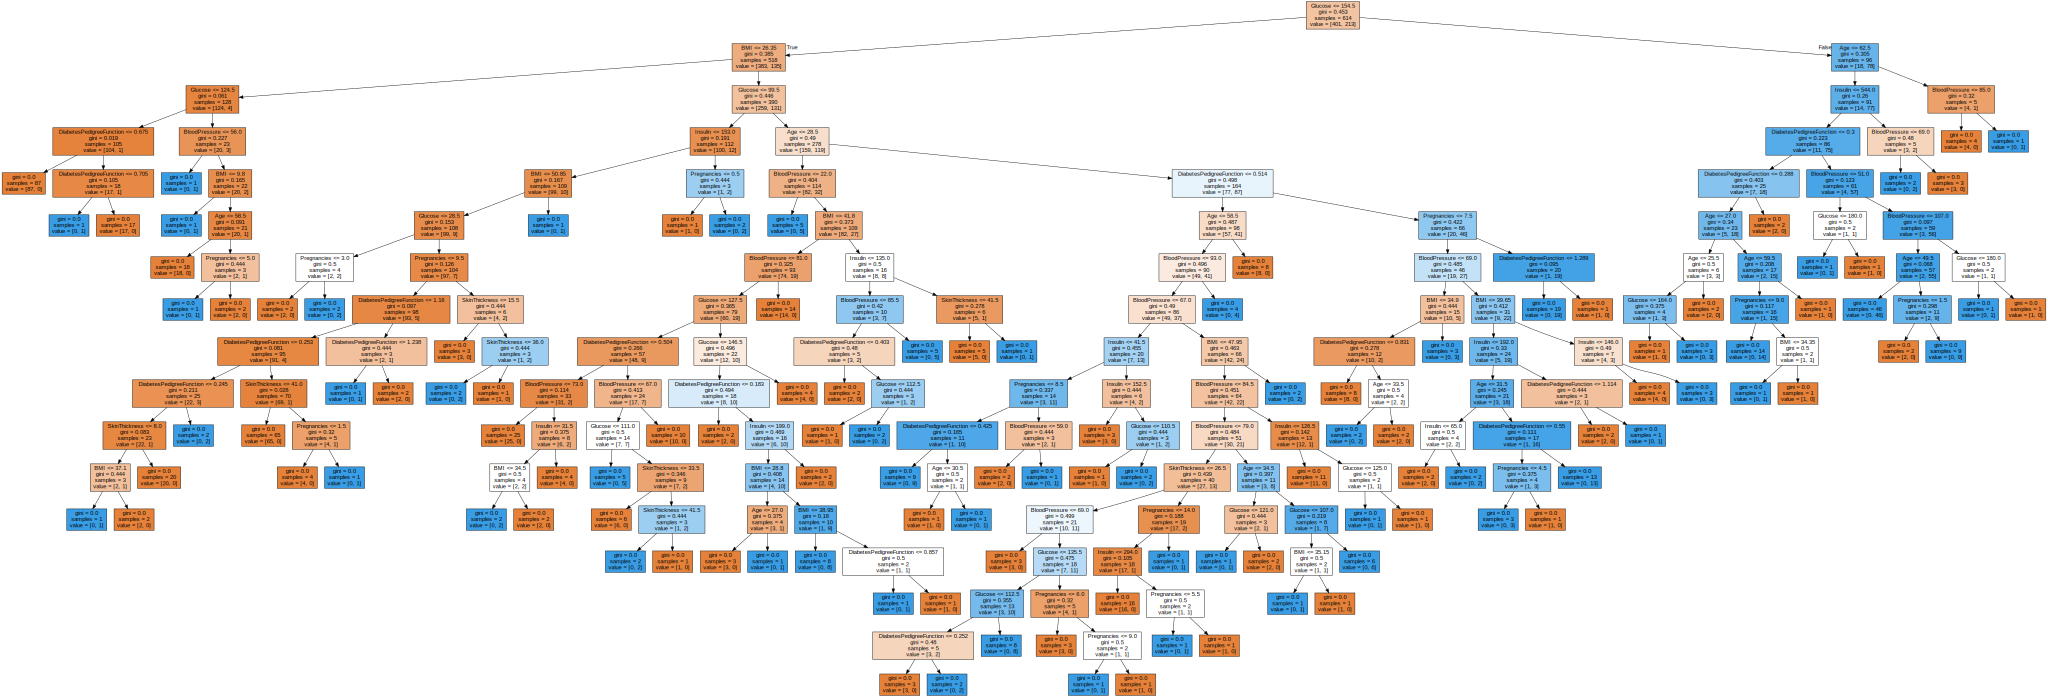

In [52]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True)
graphviz.Source(dot_tree)

In [53]:
model.feature_importances_

array([0.08030707, 0.32449856, 0.12827959, 0.04273784, 0.0740853 ,
       0.13892953, 0.11034392, 0.1008182 ])

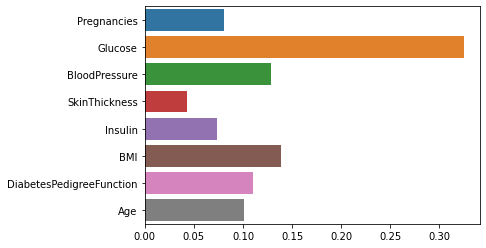

In [54]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [62]:
diff_count = abs(y_test - y_predict).sum()
diff_count

42

In [66]:
(len(y_test) - diff_count) / len(y_test) * 100

72.72727272727273

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

72.72727272727273

In [70]:
model.score(X_test, y_test) * 100

72.72727272727273